In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1) Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes de  los  años  2015, 2017, 2020. 

Es  decir  una  gráfica  por  cada  año  donde el eje horizontal esté el mes y el vertical el promedio de diaphorinas por trampa.

In [ ]:
path = 'capturas_2015-2020.xlsx'

In [ ]:
df15= pd.read_excel(path,sheet_name='2015')
df15=df15.set_index('Mes')
prom15 = pd.DataFrame(df15.groupby(level=['Mes'])['No_DiaphorinasXtrampa'].mean())
prom15

,No_DiaphorinasXtrampa
Mes,
1.0,0.092308
2.0,0.116510
3.0,0.160865
4.0,0.105462
5.0,0.037114
6.0,0.033045
7.0,0.039220
8.0,0.114808
9.0,0.156186


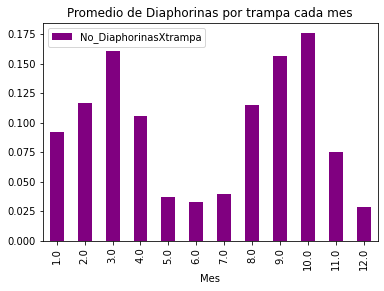

In [ ]:
g15 = prom15.plot( kind="bar", title="Promedio de Diaphorinas por trampa cada mes",color="purple")

In [ ]:
df17=pd.read_excel(path, sheet_name='2017')
df17=df17.set_index('Mes')
prom17 = pd.DataFrame(df17.groupby(level=['Mes'])['No_DiaphorinasXtrampa'].mean())
prom17

,No_DiaphorinasXtrampa
Mes,
1,0.149725
2,0.277747
3,0.566026
4,0.282143
5,0.513049
6,0.817857
7,0.303541
8,0.568561
9,0.644505


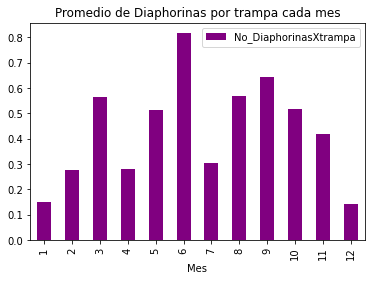

In [ ]:
g17 = prom17.plot(kind="bar",title="Promedio de Diaphorinas por trampa cada mes",color="purple")

In [ ]:
df20=pd.read_excel(path, sheet_name='2020')
df20=df20.set_index('Mes')
prom20 = pd.DataFrame(df20.groupby(level=['Mes'])['DiaphorinaXTrampa'].mean())
prom20

,DiaphorinaXTrampa
Mes,
1,0.378565
2,0.750304
3,0.502849
4,0.446075
5,0.249759
6,0.212220
7,0.305785
8,0.289525
9,0.191505


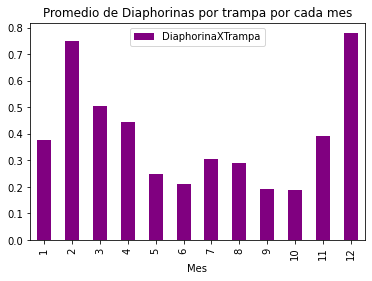

In [ ]:
g20 = prom20.plot(kind="bar",title="Promedio de Diaphorinas por trampa por cada mes",color="purple")

2) Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes del año 2020 pero sólo de un municipio.

In [ ]:
df2=pd.read_excel(path, sheet_name='2020')
df2=df2.set_index('Municipio')
df2=df2.set_index([df2.index, 'Mes'])

In [ ]:
prom2 = pd.DataFrame(df2.groupby(level=[0,1])['DiaphorinaXTrampa'].mean())

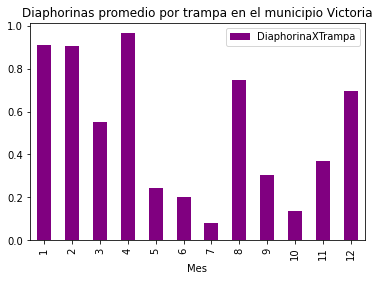

In [ ]:
prom2.loc['VICTORIA'].plot(kind="bar",title="Diaphorinas promedio por trampa en el municipio Victoria",color="purple")

3) Hacer una tabla donde la primera columna sea el mes, la segunda columna sea 
el índice Id (por trampa) y la tercera el índice Cx para el año 2015.

In [ ]:
#################
#               #
#  promedio 15  #
#               #
#################

In [ ]:
var15 = pd.DataFrame(df15.groupby(level=['Mes'])['No_DiaphorinasXtrampa'].var())
var15

,No_DiaphorinasXtrampa
Mes,
1.0,0.177460
2.0,0.396099
3.0,0.762640
4.0,0.292501
5.0,0.087597
6.0,0.168689
7.0,0.157806
8.0,0.619788
9.0,1.270551


In [ ]:
ntab= var15/prom15
ntab.rename( columns={"No_DiaphorinasXtrampa":'Indice de Dispersión'},inplace=True) 
ntab

,Indice de Dispersión
Mes,
1.0,1.922481
2.0,3.399692
3.0,4.740861
4.0,2.773530
5.0,2.360198
6.0,5.104849
7.0,4.023629
8.0,5.398486
9.0,8.134861


In [ ]:
sum15 = pd.DataFrame(df15.groupby(level=['Mes'])['No_DiaphorinasXtrampa'].sum())
sum15

,No_DiaphorinasXtrampa
Mes,
1.0,12.0
2.0,3635.0
3.0,5019.0
4.0,4113.0
5.0,1158.0
6.0,1031.0
7.0,1530.0
8.0,3582.0
9.0,4873.0


In [ ]:
ntab["Coeficiente de Green"]= (var15/prom15 - 1) / (sum15 - 1)
ntab

,Indice de Dispersión,Coeficiente de Green
Mes,,
1.0,1.922481,0.083862
2.0,3.399692,0.000660
3.0,4.740861,0.000745
4.0,2.773530,0.000431
5.0,2.360198,0.001176
6.0,5.104849,0.003985
7.0,4.023629,0.001978
8.0,5.398486,0.001228
9.0,8.134861,0.001464


4) Hacer una grafica del indice Id (por trampa) como funcion del mes que abarque desde 2015 hasta 2020



In [ ]:
id = pd.DataFrame(ntab["Indice de Dispersión"])
id

,Indice de Dispersión
Mes,
1.0,1.922481
2.0,3.399692
3.0,4.740861
4.0,2.773530
5.0,2.360198
6.0,5.104849
7.0,4.023629
8.0,5.398486
9.0,8.134861


In [ ]:
id.rename(columns={"Indice de Dispersión":'Indice de Dispersión 2015'},
                inplace=True) 
id

,Indice de Dispersión 2015
Mes,
1.0,1.922481
2.0,3.399692
3.0,4.740861
4.0,2.773530
5.0,2.360198
6.0,5.104849
7.0,4.023629
8.0,5.398486
9.0,8.134861


In [ ]:
df16 = pd.read_excel(path, sheet_name='2016')
df16=df16.set_index('Mes')
df16.dropna(subset=['No_DiaphorinasXtrampa'], inplace=True)

In [ ]:
prom16 = pd.DataFrame(df16.groupby(level=['Mes'])['No_DiaphorinasXtrampa'].mean())
var16 = pd.DataFrame(df16.groupby(level=['Mes'])['No_DiaphorinasXtrampa'].var())

In [ ]:
id['Indice de Dispersión 2016'] = var16/prom16
id

,Indice de Dispersión 2015,Indice de Dispersión 2016
Mes,,
1.0,1.922481,5.310000
2.0,3.399692,9.761346
3.0,4.740861,11.717068
4.0,2.773530,4.223622
5.0,2.360198,4.049558
6.0,5.104849,2.934491
7.0,4.023629,2.590725
8.0,5.398486,4.418055
9.0,8.134861,6.511259


In [ ]:
var17 = pd.DataFrame(df17.groupby(level=['Mes'])['No_DiaphorinasXtrampa'].var())

In [ ]:
id['Indice de Dispersión 2017'] = var17/prom17
id

,Indice de Dispersión 2015,Indice de Dispersión 2016,Indice de Dispersión 2017
Mes,,,
1.0,1.922481,5.310000,3.478753
2.0,3.399692,9.761346,6.544121
3.0,4.740861,11.717068,7.885918
4.0,2.773530,4.223622,4.195551
5.0,2.360198,4.049558,9.100249
6.0,5.104849,2.934491,36.160573
7.0,4.023629,2.590725,6.128965
8.0,5.398486,4.418055,12.437947
9.0,8.134861,6.511259,6.549489


In [ ]:
df19 = pd.read_excel(path, sheet_name='2019')
df19=df19.set_index('Mes')
df19.dropna(subset=['DiaphorinaXTrampa'], inplace=True)

In [ ]:
prom19 = pd.DataFrame(df19.groupby(level=['Mes'])['DiaphorinaXTrampa'].mean())
var19 = pd.DataFrame(df19.groupby(level=['Mes'])['DiaphorinaXTrampa'].var())

In [ ]:
id['Indice de Dispersión 2019'] = var19/prom19
id

,Indice de Dispersión 2015,Indice de Dispersión 2016,Indice de Dispersión 2017,Indice de Dispersión 2019
Mes,,,,
1.0,1.922481,5.310000,3.478753,3.257350
2.0,3.399692,9.761346,6.544121,NaN
3.0,4.740861,11.717068,7.885918,3.000252
4.0,2.773530,4.223622,4.195551,2.479519
5.0,2.360198,4.049558,9.100249,2.713940
6.0,5.104849,2.934491,36.160573,2.602474
7.0,4.023629,2.590725,6.128965,3.501284
8.0,5.398486,4.418055,12.437947,2.078174
9.0,8.134861,6.511259,6.549489,3.742555


In [ ]:
prom20 = pd.DataFrame(df20.groupby(level=['Mes'])['DiaphorinaXTrampa'].mean())
var20 = pd.DataFrame(df20.groupby(level=['Mes'])['DiaphorinaXTrampa'].var())

In [ ]:
id['Indice de Dispersión 2020'] = var20/prom20
id

,Indice de Dispersión 2015,Indice de Dispersión 2016,Indice de Dispersión 2017,Indice de Dispersión 2019,Indice de Dispersión 2020
Mes,,,,,
1.0,1.922481,5.310000,3.478753,3.257350,5.609429
2.0,3.399692,9.761346,6.544121,NaN,5.005975
3.0,4.740861,11.717068,7.885918,3.000252,3.713702
4.0,2.773530,4.223622,4.195551,2.479519,5.902033
5.0,2.360198,4.049558,9.100249,2.713940,2.537801
6.0,5.104849,2.934491,36.160573,2.602474,2.031474
7.0,4.023629,2.590725,6.128965,3.501284,27.744614
8.0,5.398486,4.418055,12.437947,2.078174,4.162430
9.0,8.134861,6.511259,6.549489,3.742555,2.497030


<Figure size 720x1080 with 0 Axes>

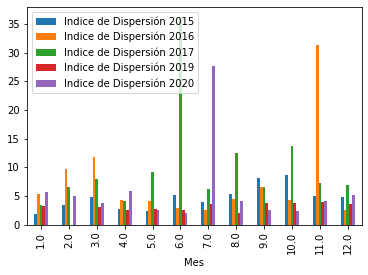

In [ ]:
plt.figure(figsize=(10, 15))
id.plot(kind="bar")

5) Hacer un grafico del centro de masa de las diaphorinas como funcion del mes que abarque del 2017 al 2020.

CM=pos*promDiaph/Ntrampas

In [ ]:
df17=pd.read_excel(path, sheet_name='2017')

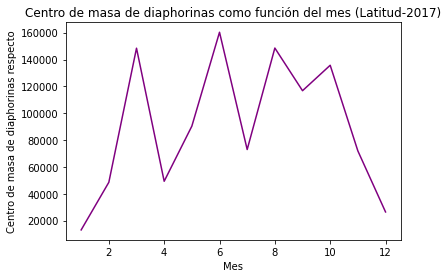

In [162]:
df_cmlat=df17[['Mes','Latitud','No_DiaphorinasXtrampa','No_Trampas_Revisadas']]
df_cmlat17 = df_cmlat.groupby('Mes').sum()
df_cmlat17['CM'] = df_cmlat17['Latitud']*df_cmlat17['No_DiaphorinasXtrampa']/df_cmlat17['No_Trampas_Revisadas']
plt.plot(df_cmlat17.index, df_cmlat17['CM'],color='purple')
plt.xlabel('Mes')
plt.ylabel('Centro de masa de diaphorinas respecto')
plt.title('Centro de masa de diaphorinas como función del mes (Latitud-2017)')
plt.show()

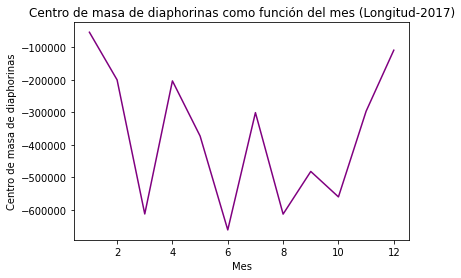

In [163]:
df_cmlon=df17[['Mes','Longitud','No_DiaphorinasXtrampa','No_Trampas_Revisadas']]
df_cmlon17 = df_cmlon.groupby('Mes').sum()
df_cmlon17['CM'] = df_cmlon17['Longitud']*df_cmlon17['No_DiaphorinasXtrampa']/df_cmlon17['No_Trampas_Revisadas']
plt.plot(df_cmlon17.index, df_cmlon17['CM'],color='purple')
plt.xlabel('Mes')
plt.ylabel('Centro de masa de diaphorinas')
plt.title('Centro de masa de diaphorinas como función del mes (Longitud-2017)')
plt.show()

In [ ]:
df20=pd.read_excel(path, sheet_name='2020')

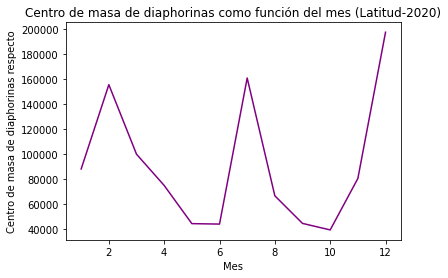

In [164]:
df_cmlat=df20[['Mes','Latitud','DiaphorinaXTrampa','Trampas_revisadas']]
df_cmlat20 = df_cmlat.groupby('Mes').sum()
df_cmlat20['CM'] = df_cmlat20['Latitud']*df_cmlat20['DiaphorinaXTrampa']/df_cmlat20['Trampas_revisadas']
plt.plot(df_cmlat20.index, df_cmlat20['CM'],color='purple')
plt.xlabel('Mes')
plt.ylabel('Centro de masa de diaphorinas respecto')
plt.title('Centro de masa de diaphorinas como función del mes (Latitud-2020)')
plt.show()

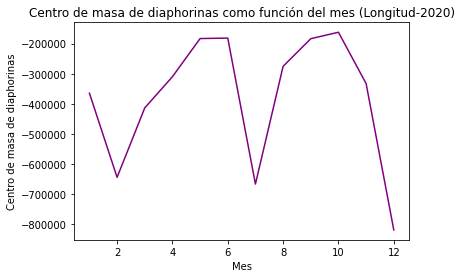

In [165]:
df_cmlon=df20[['Mes','Longitud','DiaphorinaXTrampa','Trampas_revisadas']]
df_cmlon20 = df_cmlon.groupby('Mes').sum()
df_cmlon20['CM'] = df_cmlon20['Longitud']*df_cmlon20['DiaphorinaXTrampa']/df_cmlon20['Trampas_revisadas']
plt.plot(df_cmlon20.index, df_cmlon20['CM'],color='purple')
plt.xlabel('Mes')
plt.ylabel('Centro de masa de diaphorinas')
plt.title('Centro de masa de diaphorinas como función del mes (Longitud-2020)')
plt.show()